This lecture is formed by some examples from the book "Machine Learning with PyTorch and Scikit-Learn by Sebastian Raschka, Yuxi Liu, and Vahid Mirjalili". I highly recommend this book for machine learning beginners due to its rich hands-on examples.

In [2]:
from IPython.display import Image


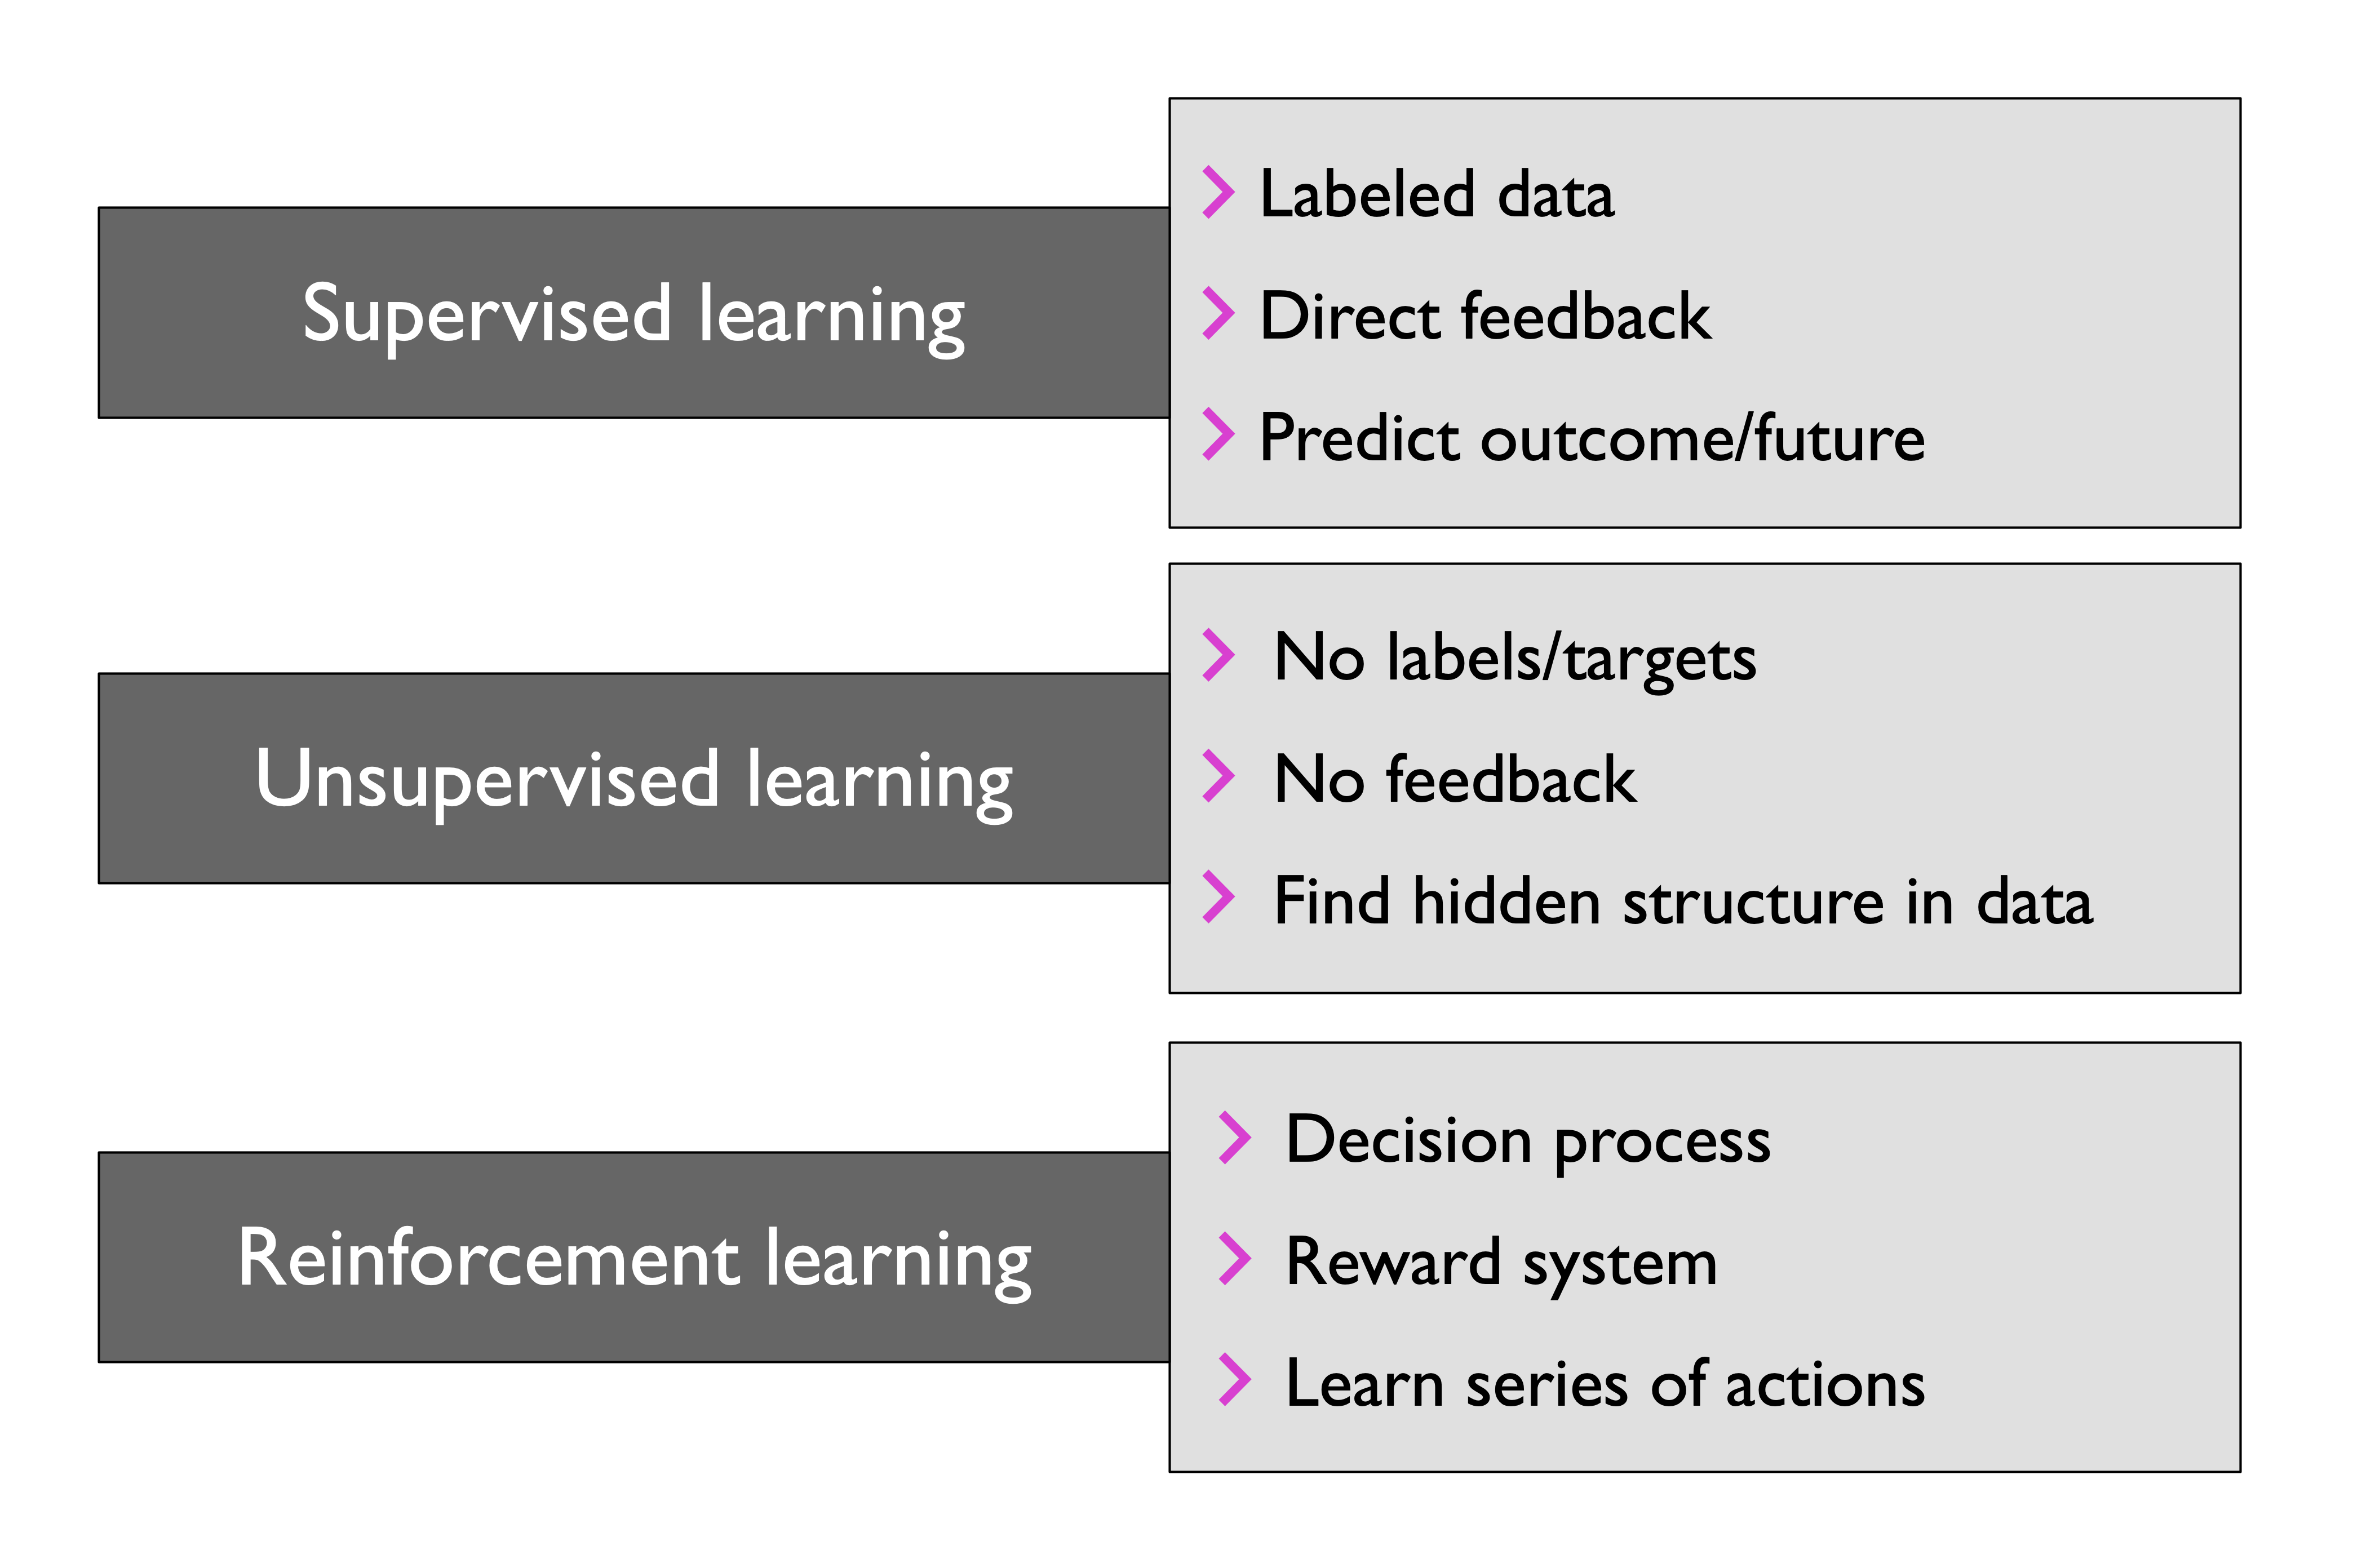

In [ ]:
#There are three different types of machine learning

Image(filename='./figures/01_01.png', width=500)

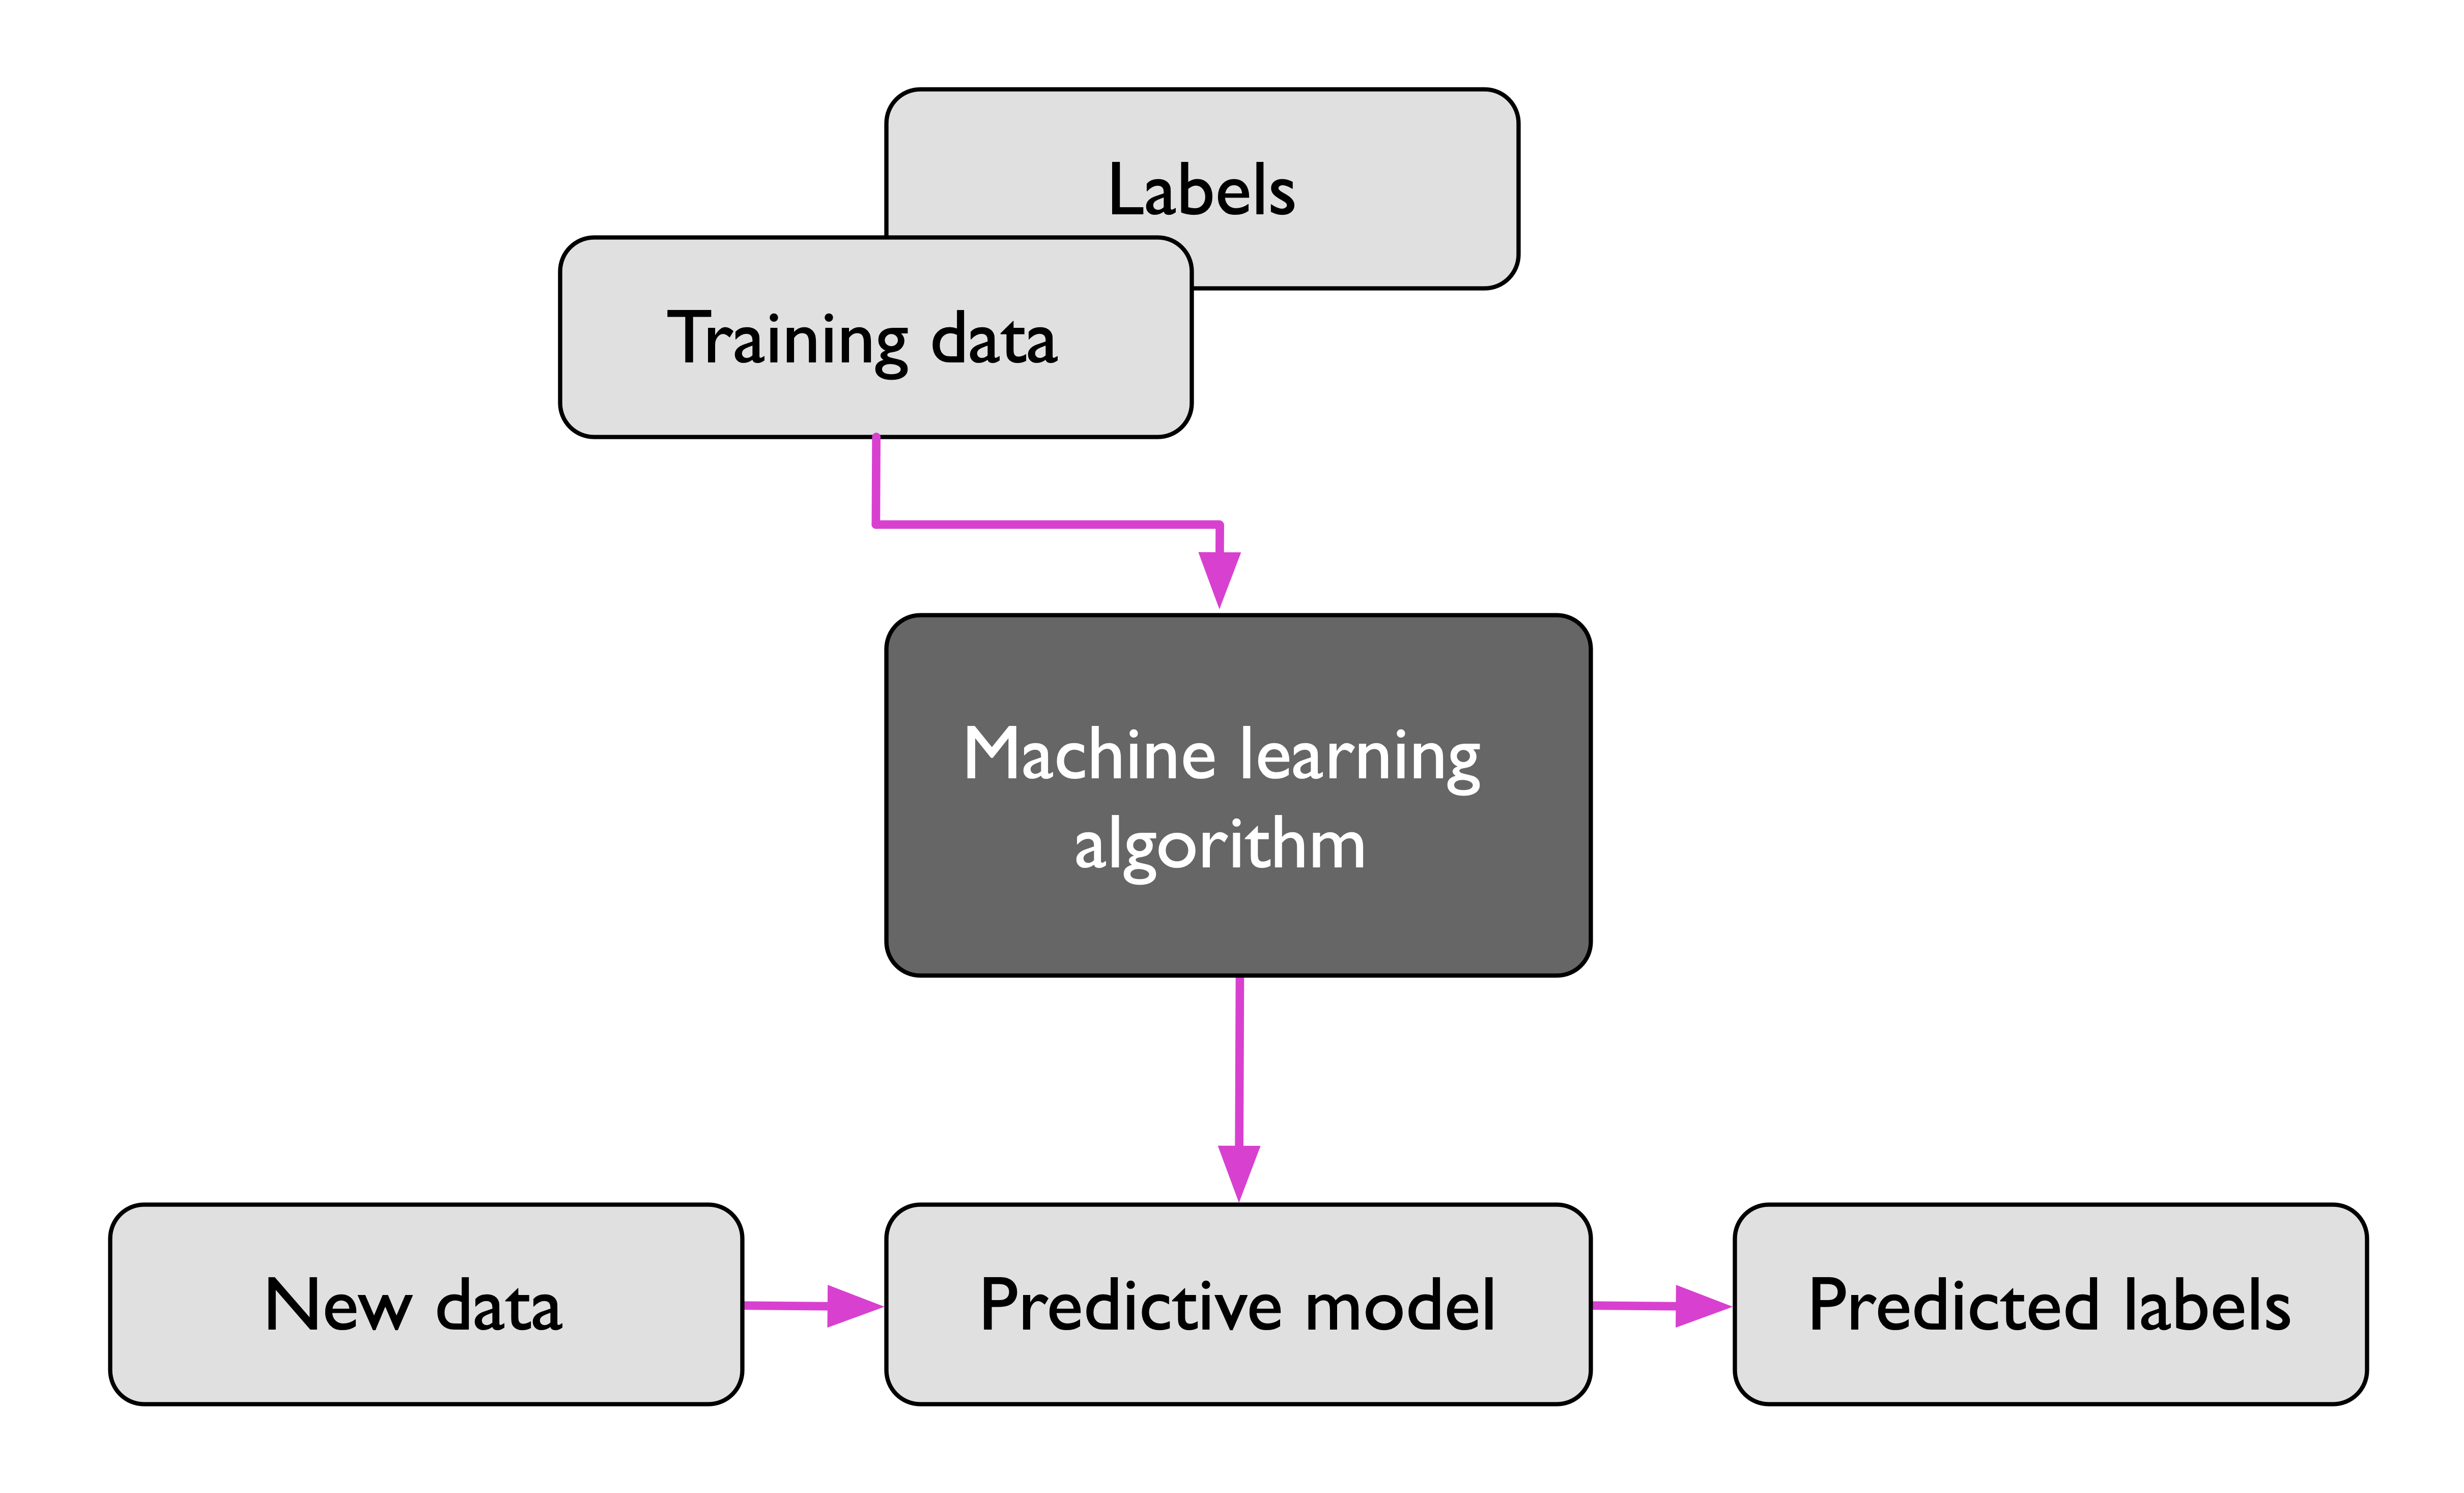

In [ ]:
#supervised learning process
Image(filename='./figures/01_02.png', width=500)

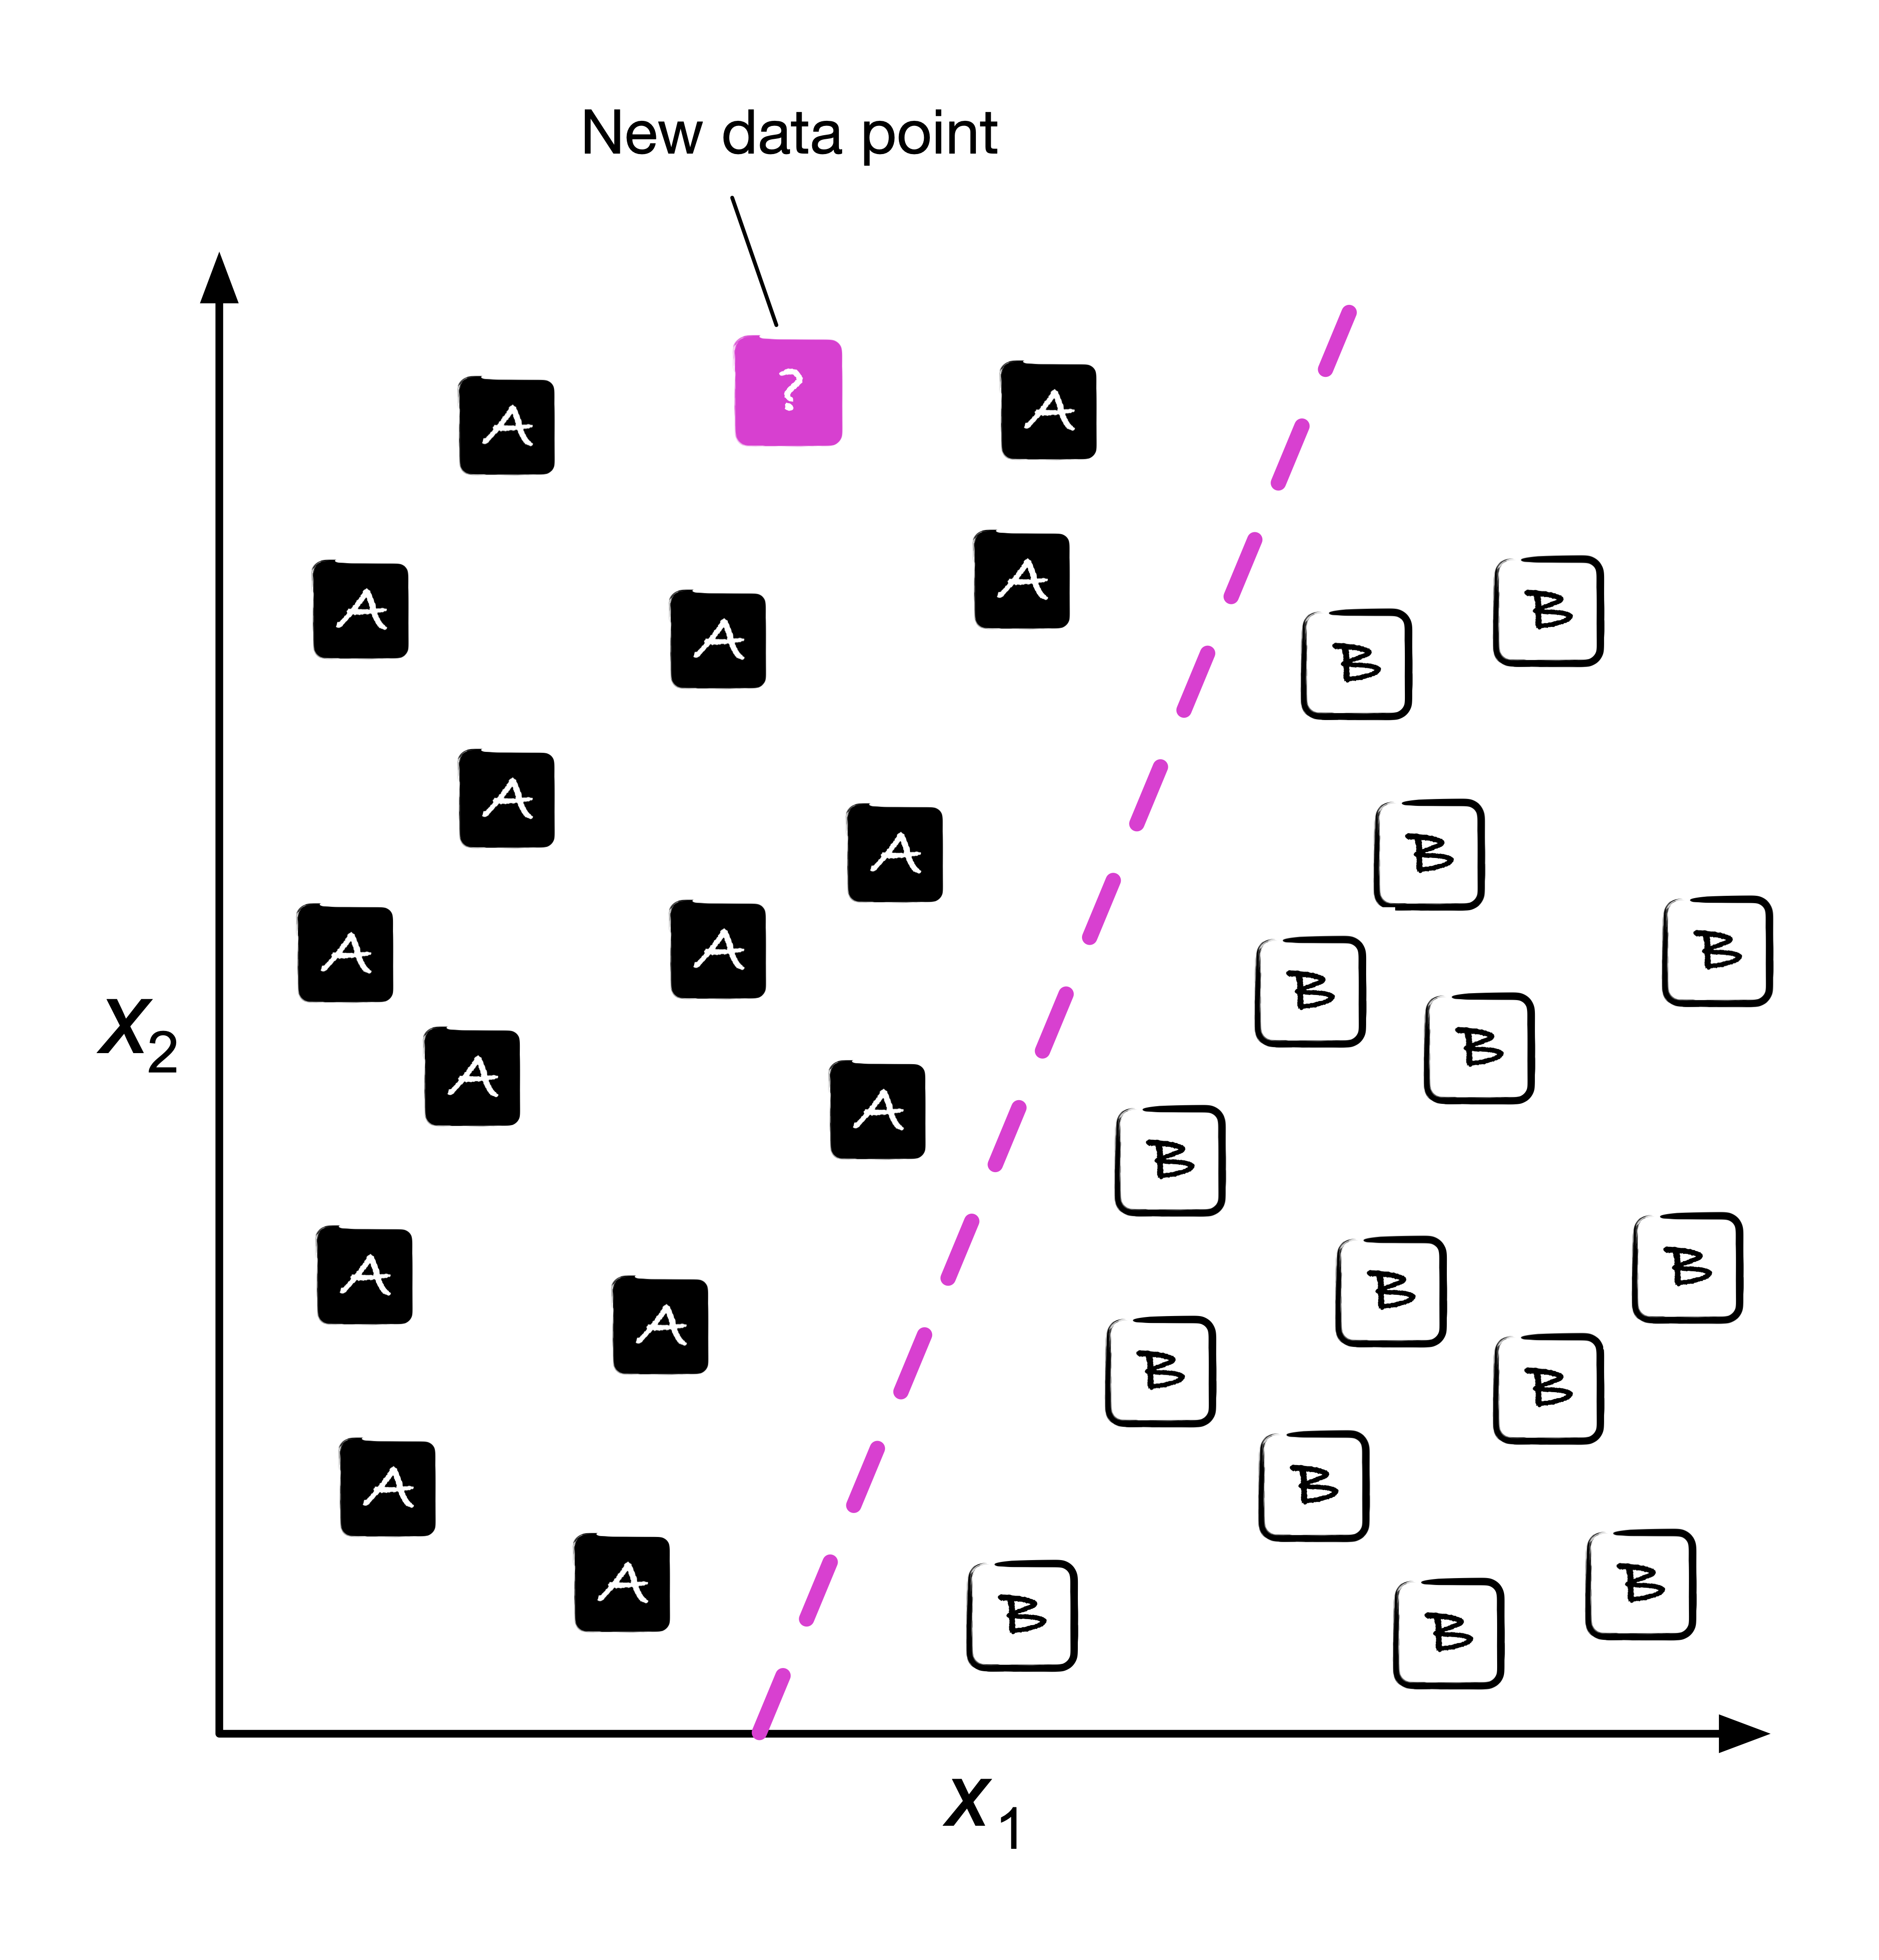

In [ ]:
#Example" Classification example with two variables and a label
Image(filename='./figures/01_03.png', width=300)

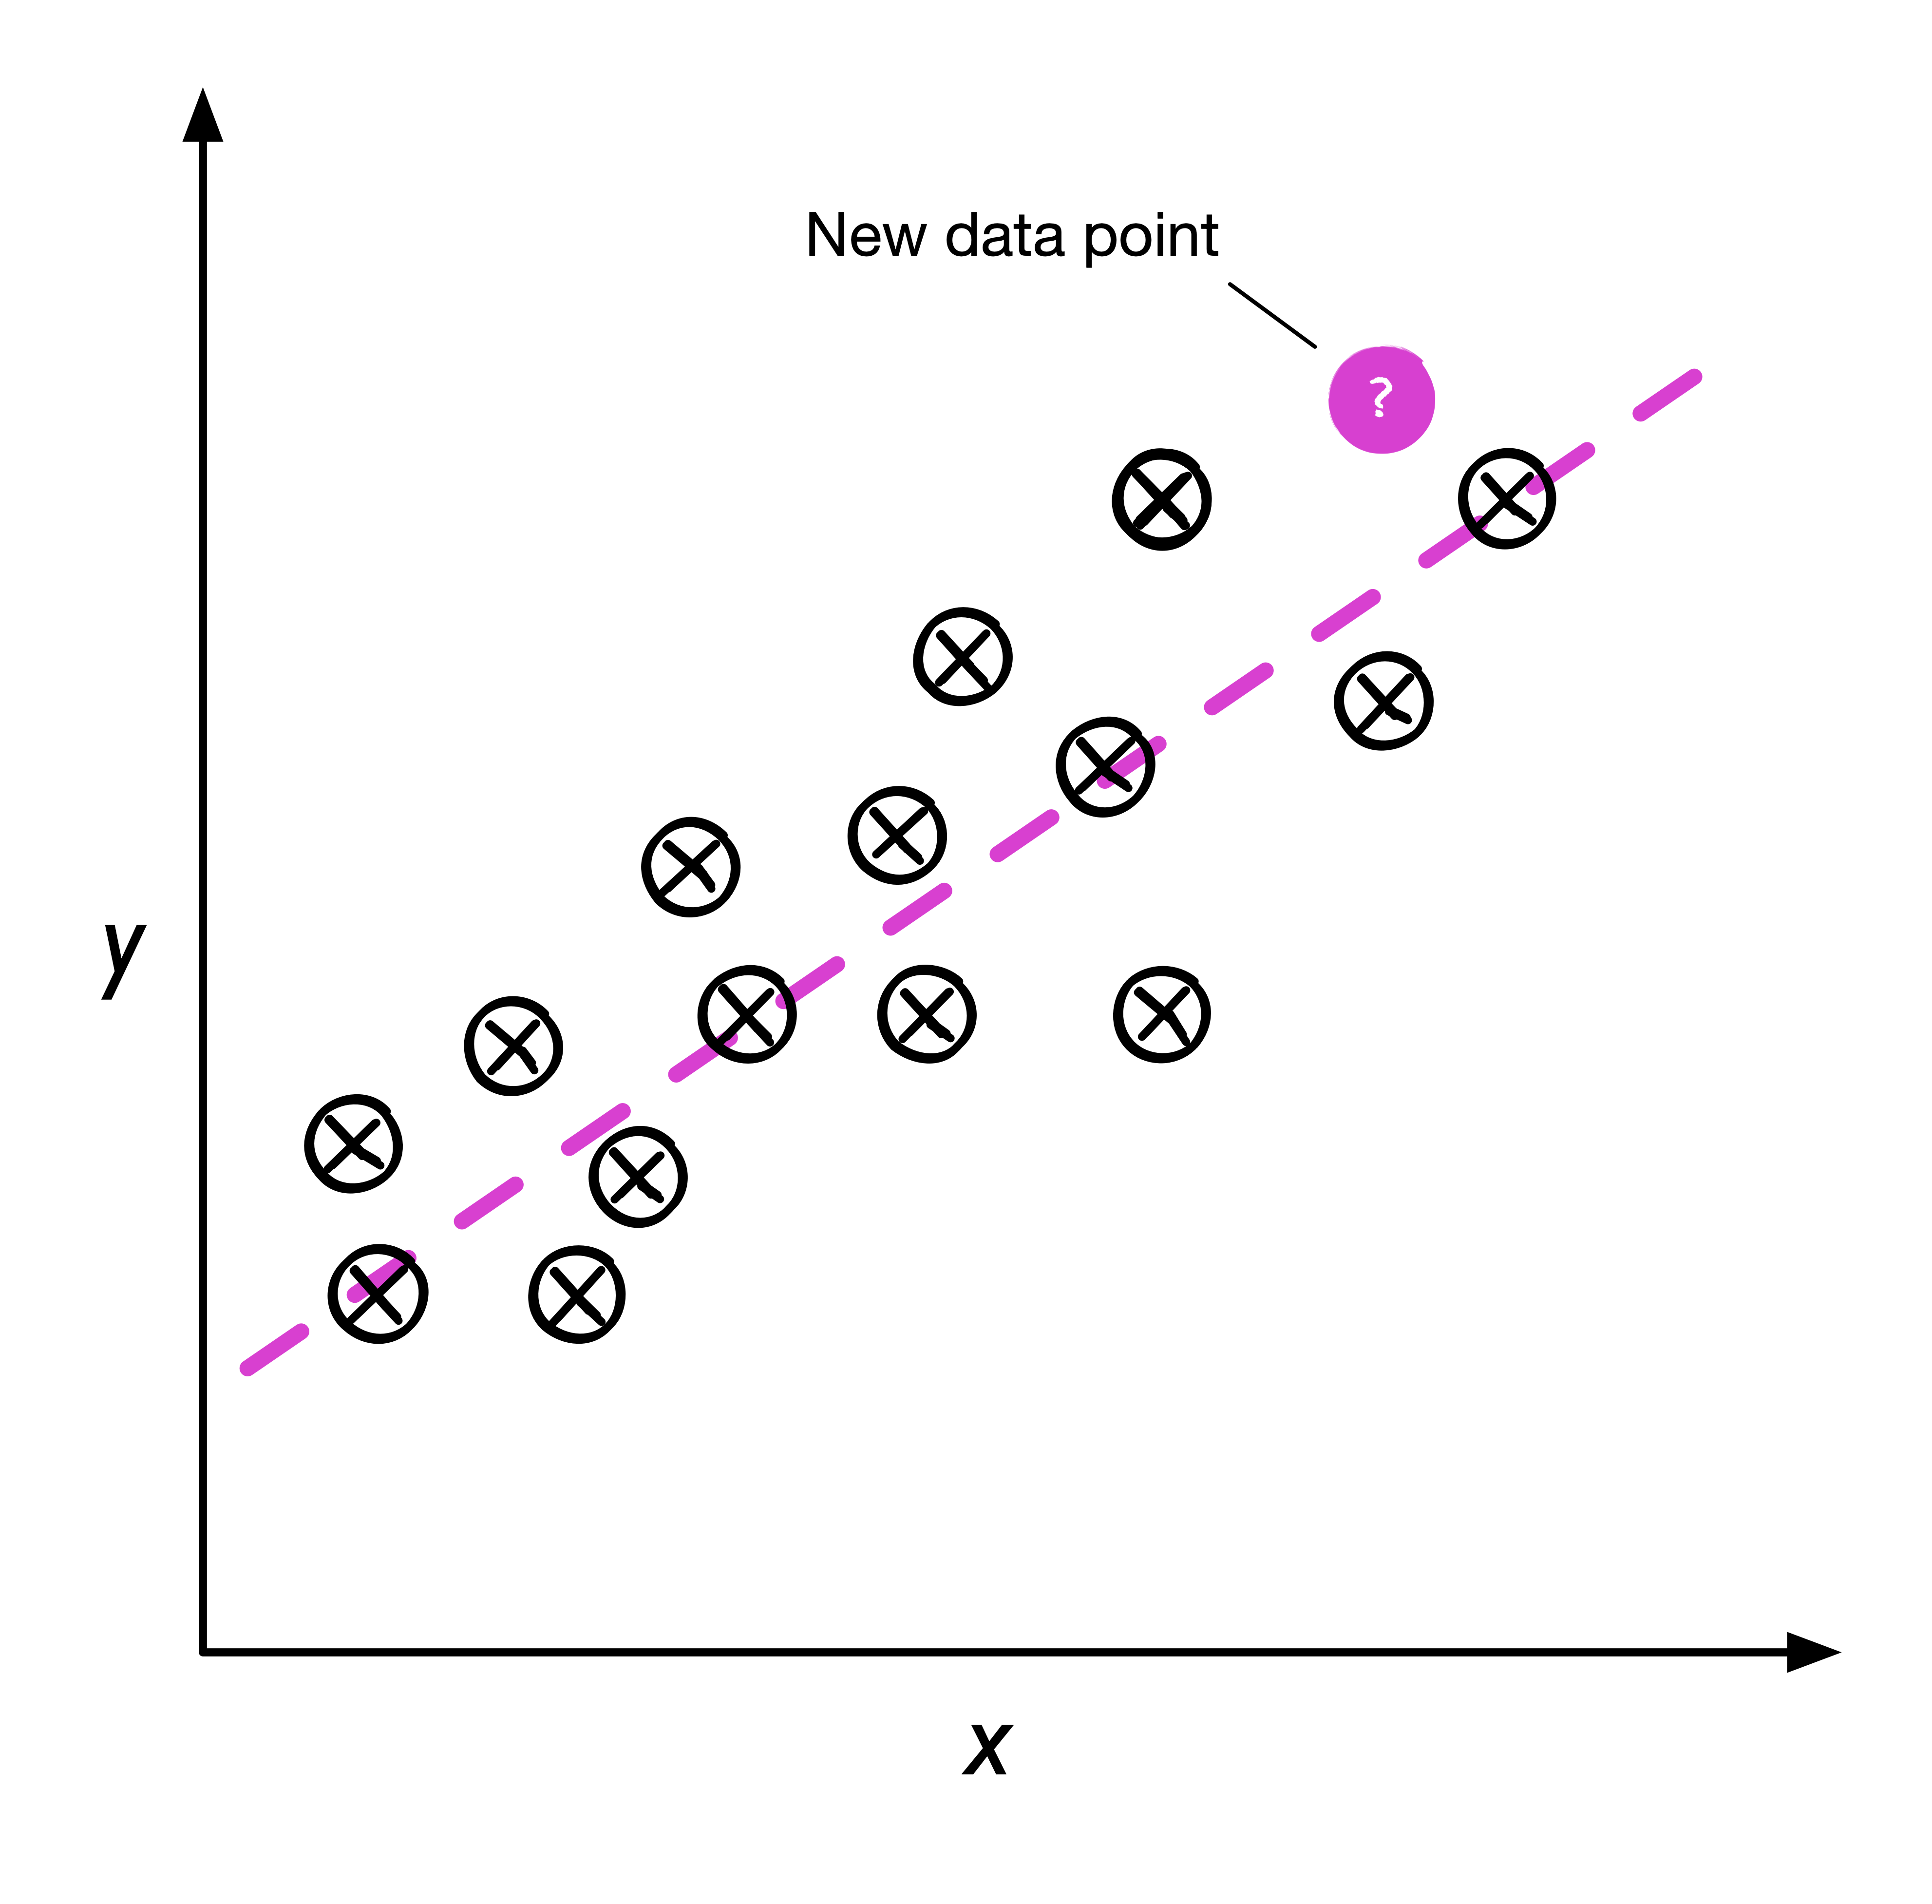

In [ ]:
#Example of linear regression (continuous outcome)
Image(filename='./figures/01_04.png', width=300)

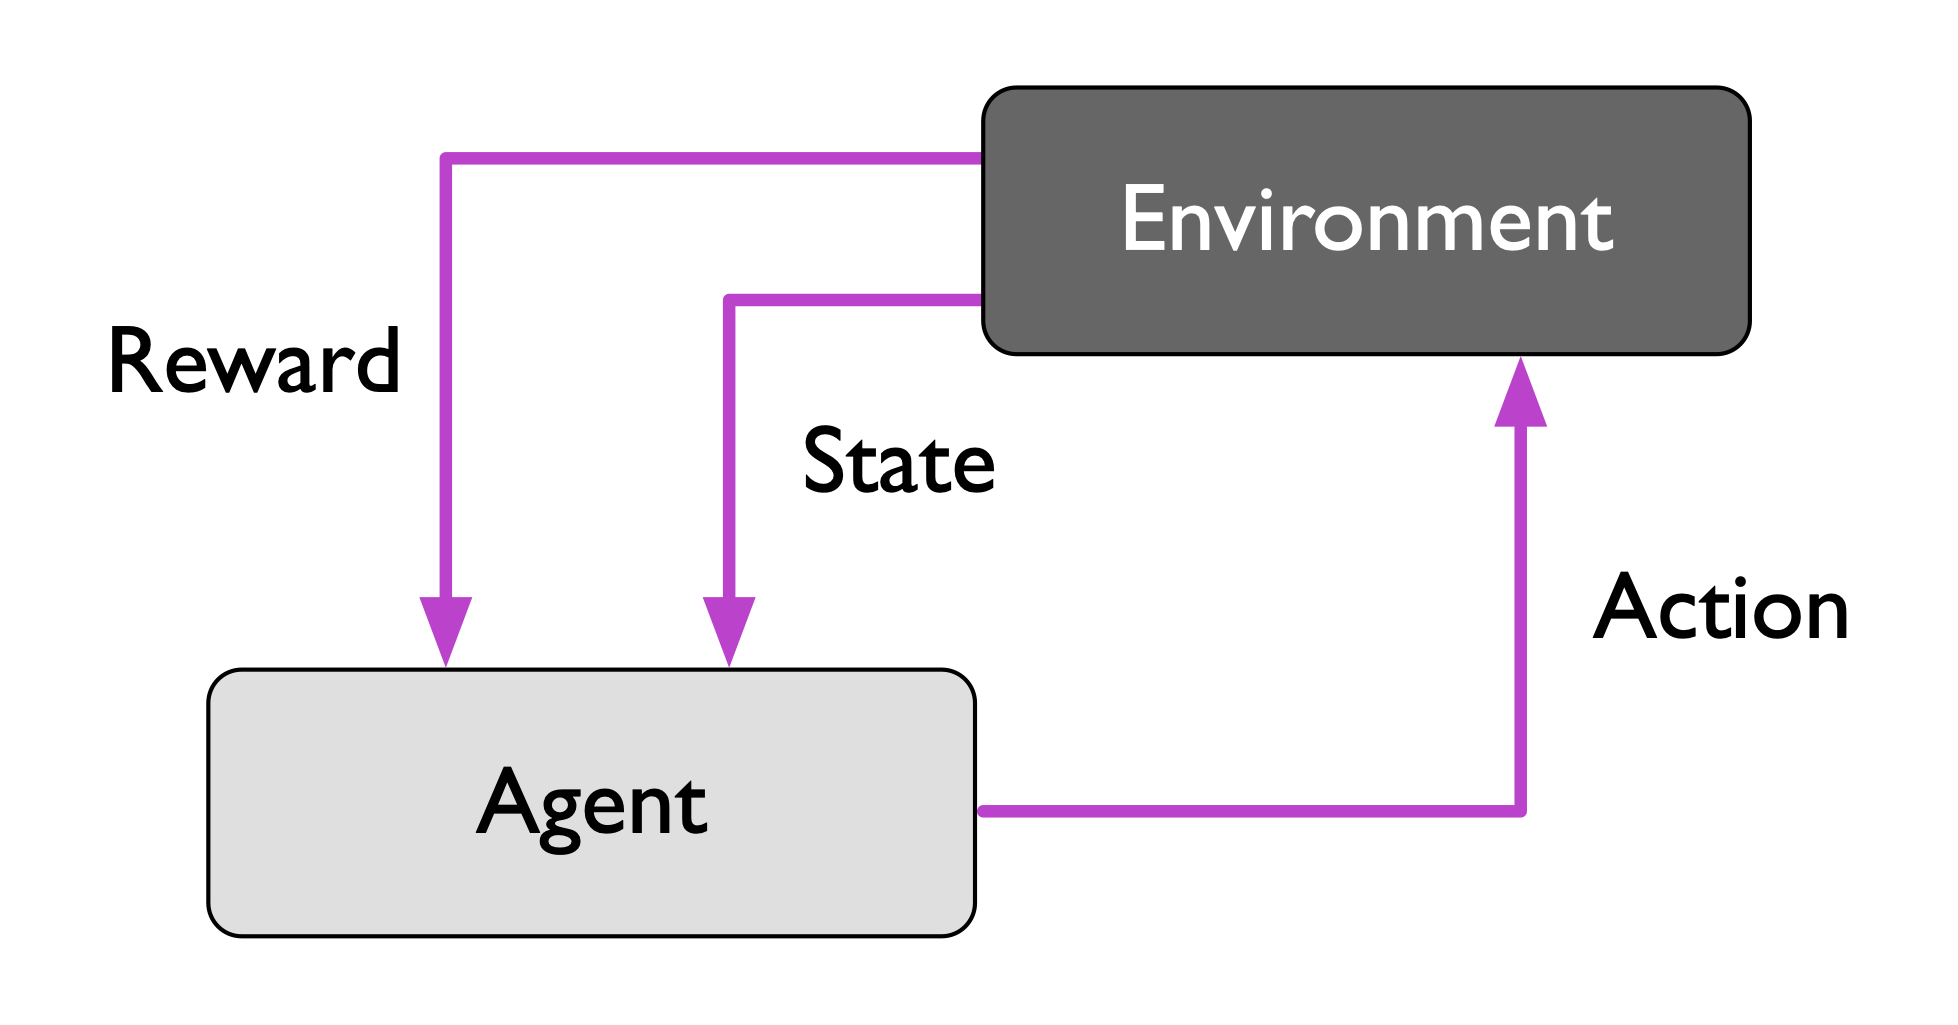

In [ ]:
#Solving interactive problems with reinforcement learning
Image(filename='./figures/01_05.png', width=300)

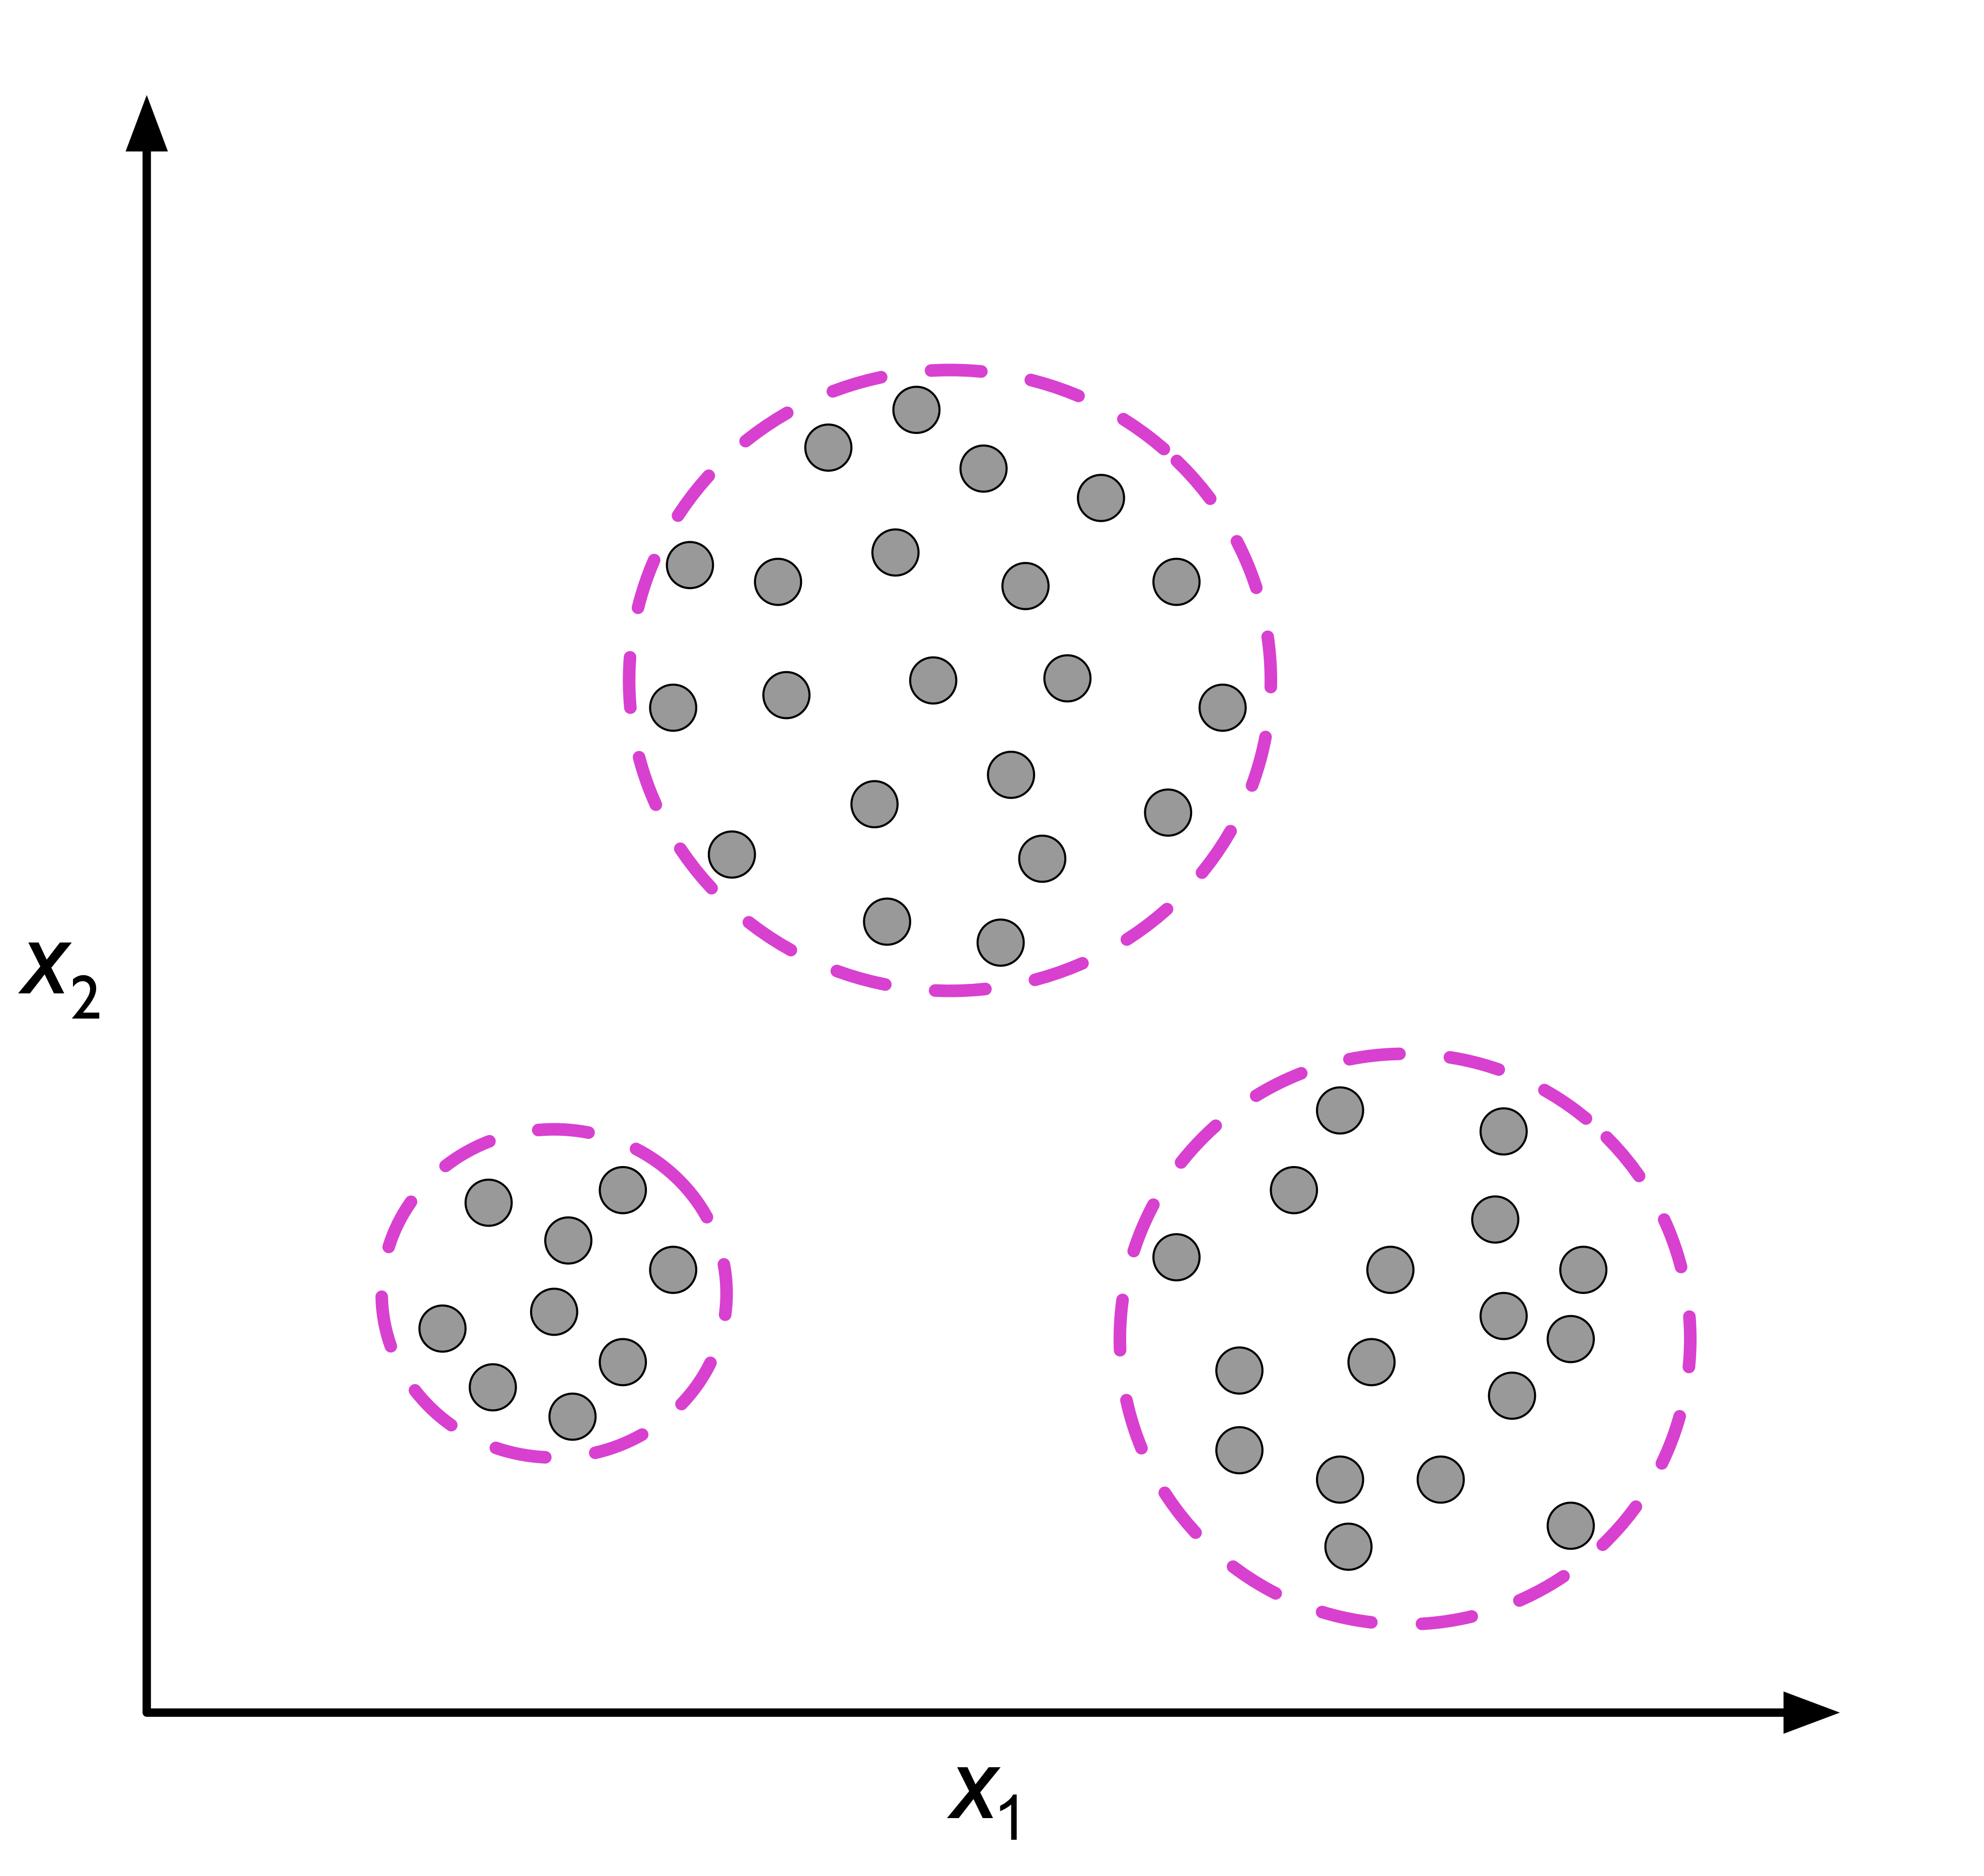

In [ ]:
#Example: Unsupervised clustering
Image(filename='./figures/01_06.png', width=300)

In [1]:
#In summary, each classification algorithms has its inherent biases.
#Therefore in practice, it is very rare to use just one machine learning algorithm for a given task.
#Image(filename='./figures/01_09.png', width=700)

NameError: name 'Image' is not defined

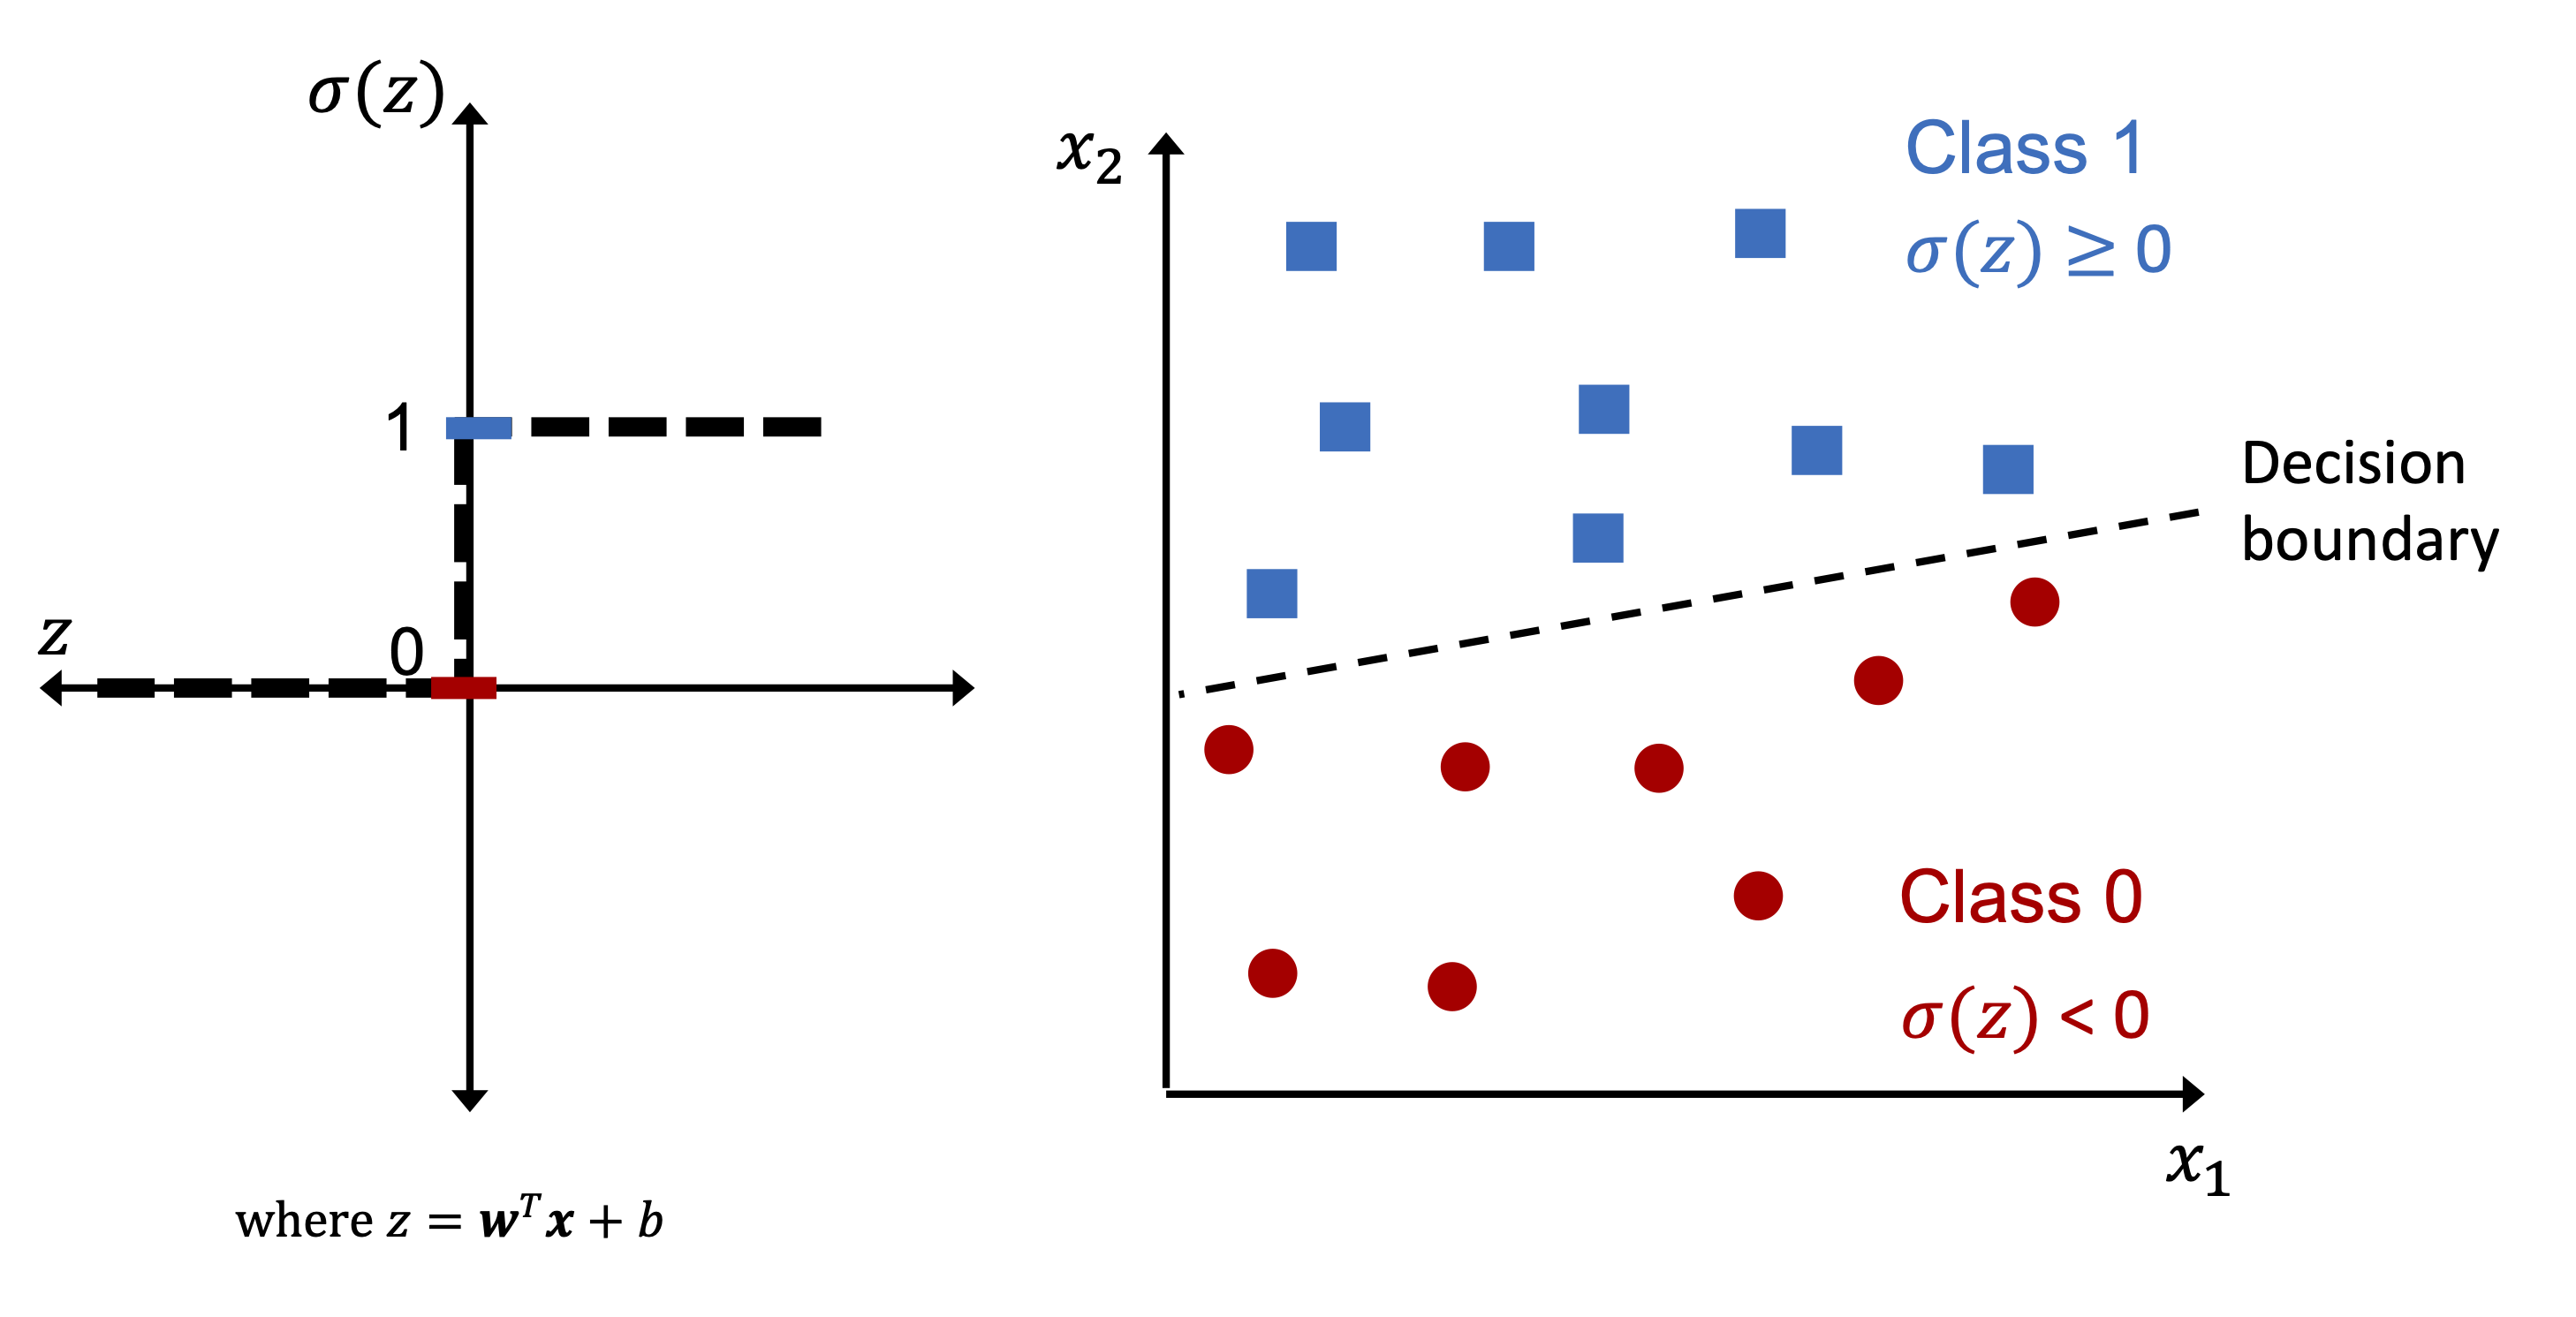

In [ ]:
Image(filename='./figures/02_02.png', width=500)

Frequently Visited Terms in Machine Learning:
* Training example: A row in a table representing the dataset and synonymous with an observation, record, instance, or sample (in most contexts, sample refers to a collection of training examples).

* Training: Model fitting, for parametric models similar to parameter estimation.

* Feature, abbrev. x: A column in a data table or data (design) matrix. Synonymous with predictor, variable, input, attribute, or covariate.

* Target, abbrev. y: Synonymous with outcome, output, response variable, dependent variable, (class) label, and ground truth.


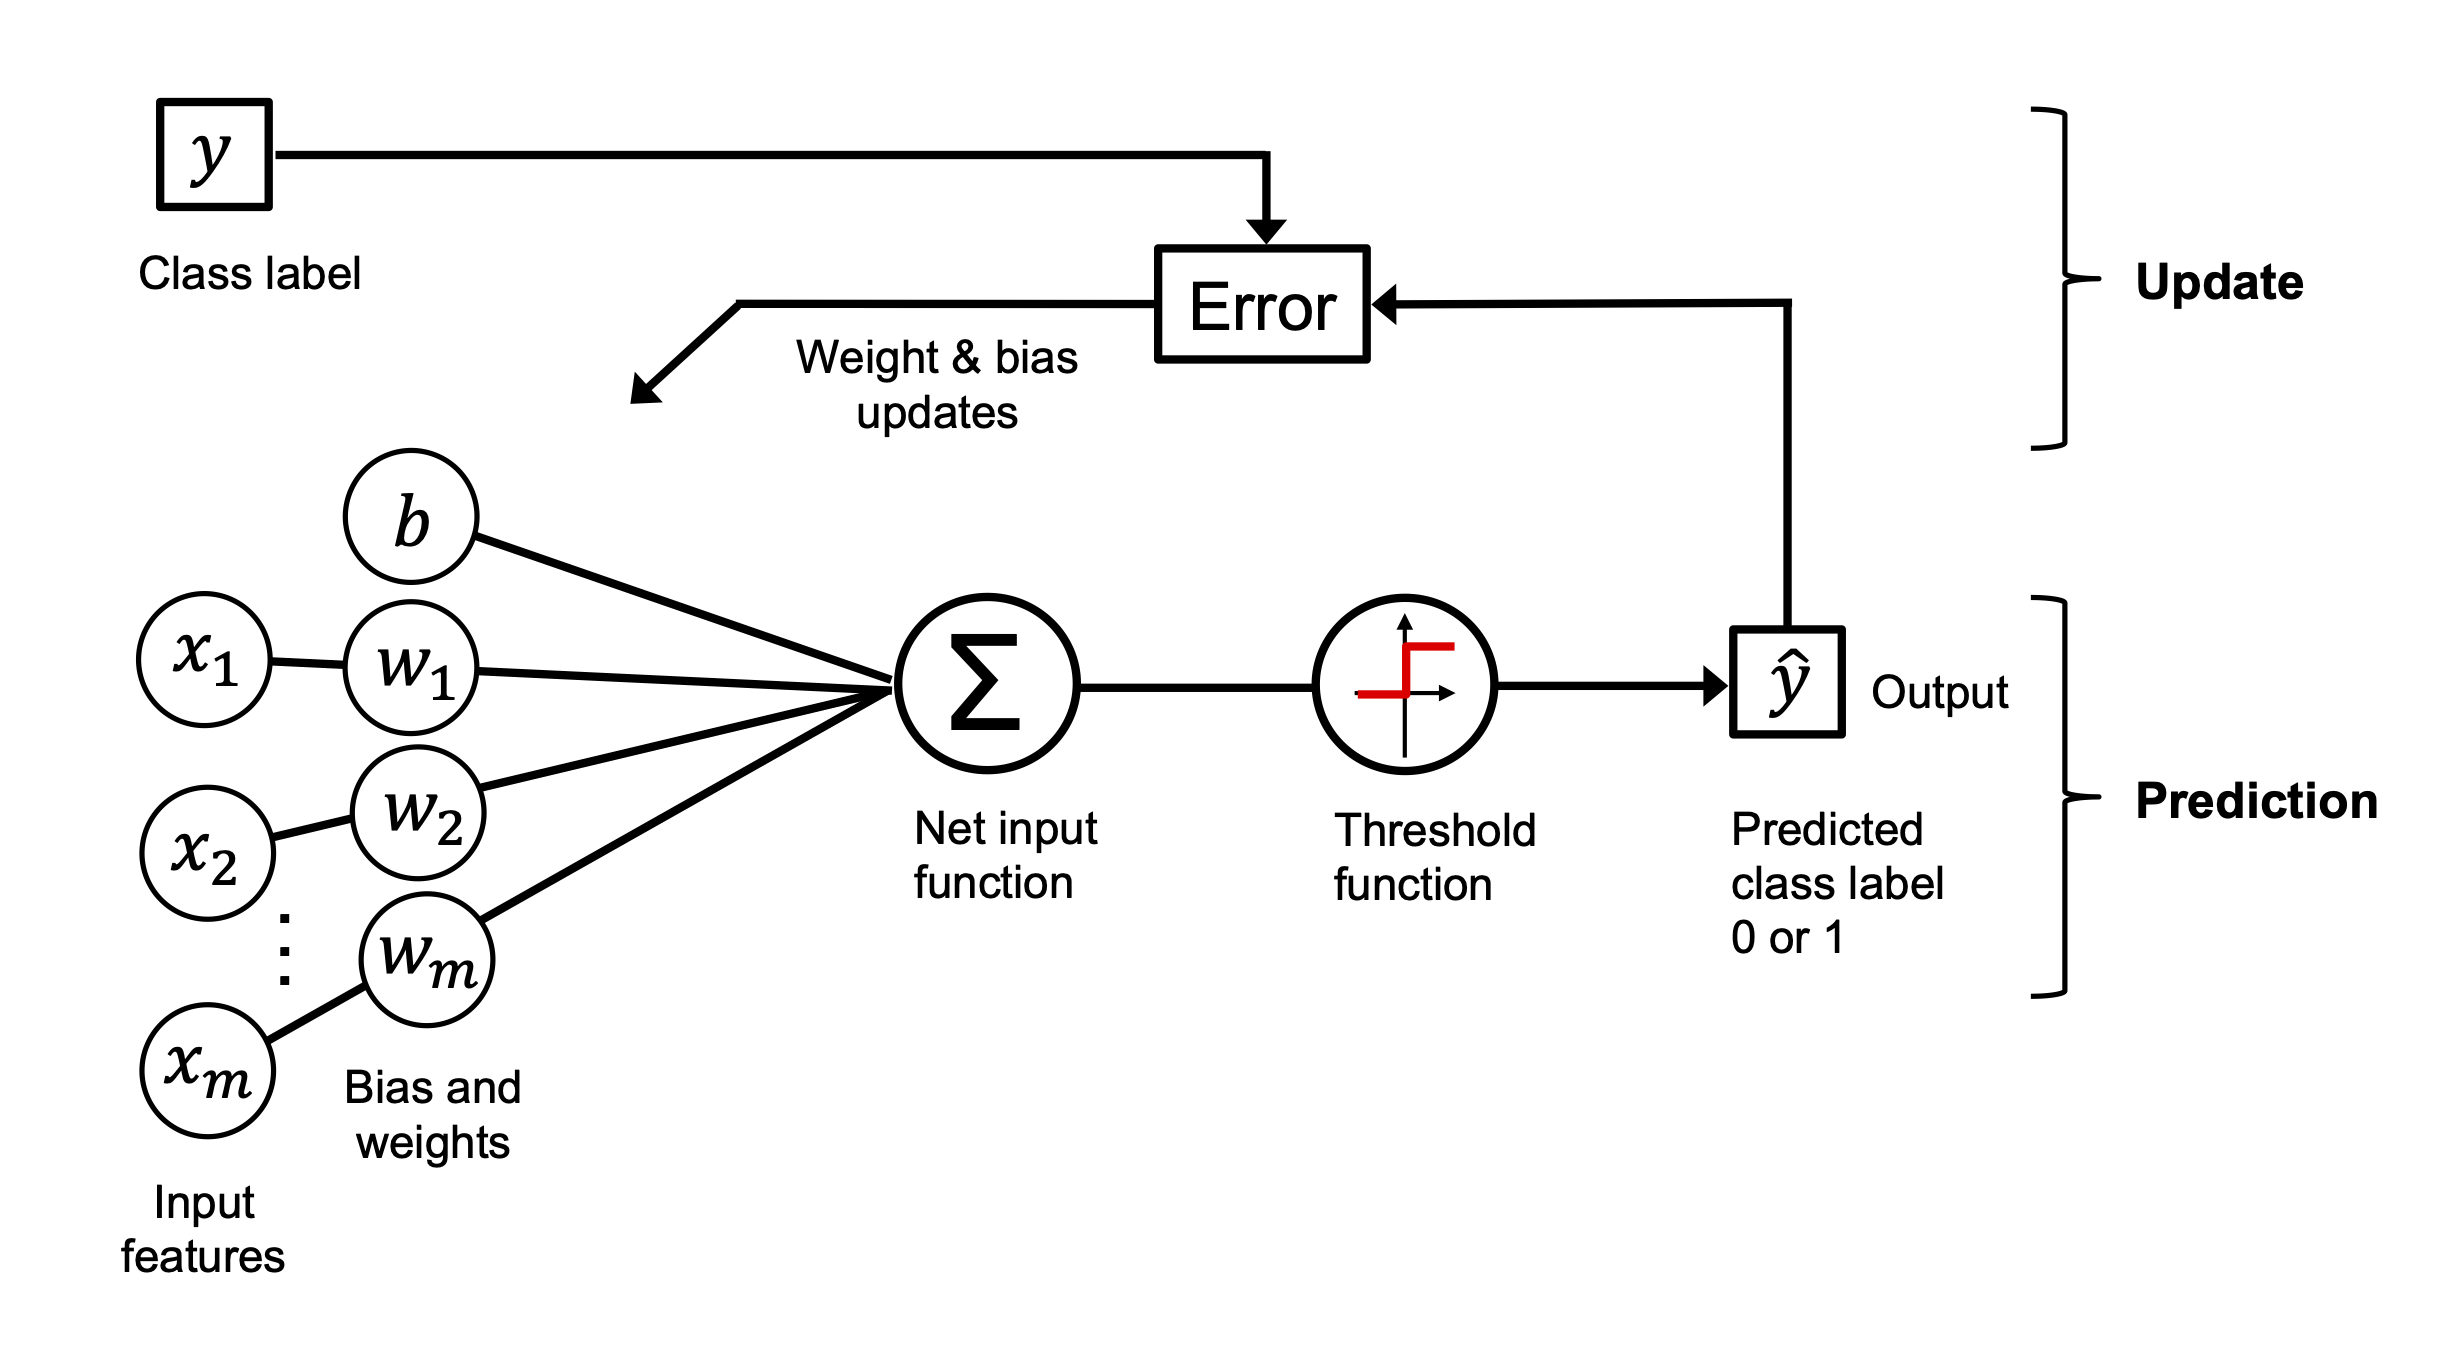

In [ ]:
# The Perceptron is a linear machine learning algorithm.
# The weights/coefficients of the linear funtion is trained by
# stochastic gradient descent optimization algorithm.
Image(filename='./figures/02_04.png', width=600)

# Let's explore some machine learnig classification algorithms

Steps of training supervised machine learning algorithm:
1. Select features and collecting labeled training examples.
2. Choosing a performance metric
3. Choosing a learning algorithm and training a model
4. Evaluating the performance of the model
5. Changing the settings of the algorithm and tuning the model

In [3]:
from IPython.display import Image
%matplotlib inline
import numpy as np

In [2]:
from sklearn import datasets #sample data set

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

NameError: name 'np' is not defined

In [4]:
Image(filename='./figures/01_08.png', width=500)

FileNotFoundError: ignored

In [4]:
#Split the data into 70% training and 30% test data:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
#random_state = 1 indicates a fixed dataset

In [10]:
y_test

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [5]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [7]:
#Standardizing the features:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
from sklearn.linear_model import Perceptron
#configure the learning rate (eta0), which defaults to 1.0.
#you may also configure the total number of training epochs (max_iter), which defaults to 1,000.

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [11]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [12]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='Test set')

Training a perceptron model using the standardized training data:

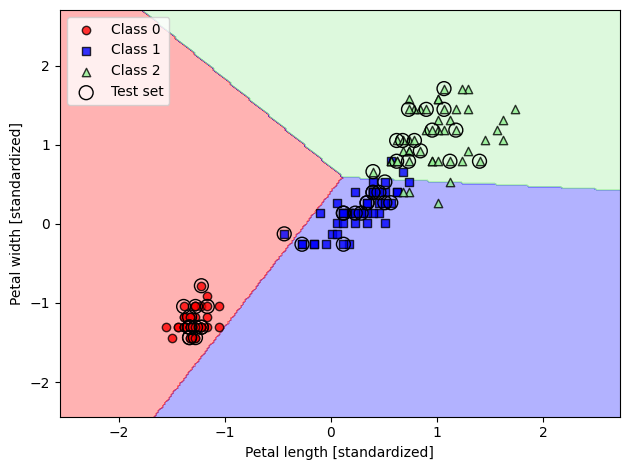

In [14]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# HW 5: Apply the linear regression algorithm as above to Pokemons

Consider the pokemon data set, what variables shall be considered as variables x? What should be the respond variable y?

Hint: You don't have to visualize the classification result hence x can consist of more than two dimensions. You should also not take all features and put them in x, since that will cause an overfitting problem.

